In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('cleanedData.csv')
df.head(5)

,City_A,City_Abbeville,City_Akron,City_Alameda,City_Albany,City_Albuquerque,City_Aldie,City_Aledo,City_Alhambra,City_Allen Park,...,Immune_chronicmonoorepstein-barrvirus,Immune_frequentherpesoutbreaks,Immune_viralinfectionsbecomebacterial,Immune_increasedsusceptibilitytocancer,Reproductive_changesinmenstrualcycle,Reproductive_inconsistentmenstrualcycle,Reproductive_vaginalyeastorbacterialinfections,Reproductive_jockitch,Reproductive_infertilityinbothgenders,Reproductive_hormoneimbalances
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Principal Component Analysis(PCA) to reduce the 145 columns

In [25]:
#Inital Shape
df.shape

(553, 628)

In [26]:
# Extracting mold columns for PCA analysis
moldDF = df.loc[:,'Aspergillus flavus/oryzae':'Rhizopus stolonifer']
moldDF.columns

Index(['Aspergillus flavus/oryzae', 'Aspergillus fumigatus',
       'Aspergillus niger', 'Aspergillus ochraceus',
       'Aspergillus penicillioides', 'Aspergillus restrictus*',
       'Aspergillus sclerotiorum', 'Aspergillus sydowii', 'Aspergillus unguis',
       'Aspergillus versicolor', 'Aureobasidium pullulans',
       'Chaetomium globosum', 'Cladosporium sphaerospermum',
       'Eurotium (Asp.) amstelodami*', 'Paecilomyces variotii',
       'Penicillium brevicompactum', 'Penicillium corylophilum',
       'Penicillium crustosum*', 'Penicillium purpurogenum',
       'Penicillium spinulosum*', 'Penicillium variabile',
       'Scopulariopsis brevicaulis/fusca', 'Scopulariopsis chartarum',
       'Stachybotrys chartarum', 'Trichoderma viride*', 'Wallemia sebi',
       'Acremonium strictum', 'Alternaria alternata', 'Aspergillus ustus',
       'Cladosporium cladosporioides 1', 'Cladosporium cladosporioides 2',
       'Cladosporium herbarum', 'Epicoccum nigrum', 'Mucor amphibiorum*',
    

In [27]:
nan_count = np.sum(moldDF.isnull(), axis = 0)
print(nan_count)

Aspergillus flavus/oryzae           0
Aspergillus fumigatus               0
Aspergillus niger                   0
Aspergillus ochraceus               0
Aspergillus penicillioides          0
Aspergillus restrictus*             0
Aspergillus sclerotiorum            0
Aspergillus sydowii                 0
Aspergillus unguis                  0
Aspergillus versicolor              0
Aureobasidium pullulans             0
Chaetomium globosum                 0
Cladosporium sphaerospermum         0
Eurotium (Asp.) amstelodami*        0
Paecilomyces variotii               0
Penicillium brevicompactum          0
Penicillium corylophilum            0
Penicillium crustosum*              0
Penicillium purpurogenum            0
Penicillium spinulosum*             0
Penicillium variabile               0
Scopulariopsis brevicaulis/fusca    0
Scopulariopsis chartarum            0
Stachybotrys chartarum              0
Trichoderma viride*                 0
Wallemia sebi                       0
Acremonium s

1. Standardaization

In [28]:
#Scaling data, normalizing it to a common scale using standard 
scaler = StandardScaler()
scaler.fit(moldDF)
X_standardized = scaler.transform(moldDF)
covariance_matrix = np.cov(X_standardized,rowvar=False)
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
explained_variance_ratio = eig_values / np.sum(eig_values)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# Choose the number of components to retain
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

selected_eig_vectors = eig_vectors[:, :num_components]
X_pca = X_standardized.dot(selected_eig_vectors)


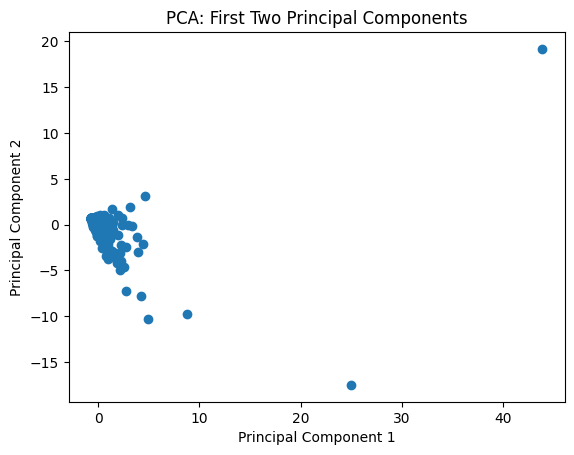

In [29]:

# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.show()


In [ ]:


# Assuming you have a DataFrame 'df' with one-hot encoded symptoms and mold values
# Group by symptoms and calculate the maximum mold value for each group
max_mold_values_by_symptom = df.groupby('symptom_columns')['mold_values_column'].max()

# Create a bar plot
plt.figure(figsize=(12, 6))
max_mold_values_by_symptom.plot(kind='bar', color='skyblue')
plt.xlabel('Symptoms')
plt.ylabel('Maximum Mold Values')
plt.title('Maximum Mold Values by Symptom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
